In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score, mean_squared_error

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset = fetch_california_housing()
data = dataset['data']
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
print(dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [4]:
x = dataset['data']
y = dataset['target']
feature_names = dataset['feature_names']

In [5]:
from sklearn.feature_selection import mutual_info_regression, SelectPercentile, SelectKBest
mi = mutual_info_regression(x, y)

In [6]:
x.shape

(20640, 8)

In [7]:
print(mi)

[0.38773591 0.03108862 0.10339683 0.02450512 0.02207182 0.07261465
 0.37207681 0.4016582 ]


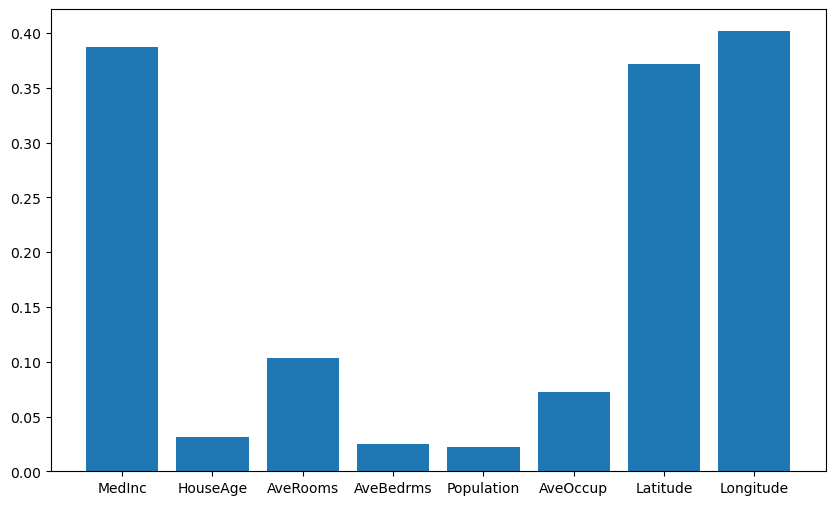

In [8]:
# Visualise Feature Selection
plt.figure(figsize=(10, 6))
plt.bar(feature_names, mi)
plt.show()

In [13]:
# Option 1
x_new = SelectPercentile(mutual_info_regression, percentile=50).fit_transform(x, y)
print(x_new.shape)

(20640, 4)


In [19]:
# Option 2
x_new = SelectKBest(mutual_info_regression, k=6).fit_transform(x, y)
print(x_new.shape)

(20640, 6)


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)

In [21]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
#print(r2_score(y_test, y_pred))
r2_s = r2_score(y_test, y_pred)
mse_err = mean_squared_error(y_test, y_pred)

print(r2_s, mse_err)

0.5915131522770063 0.5426041584662795


In [22]:
x = dataset['data']
y = dataset['target']
feature_names = dataset['feature_names']
print(x.shape)

(20640, 8)


# Two ways of usage

a. Analyse the relationship between 'each' individual feature (input) and output

In [23]:
from sklearn.feature_selection import f_regression, SelectKBest

In [26]:
x_new = SelectKBest(f_regression, k=6).fit_transform(x, y)
print(x_new.shape)

(20640, 6)


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
#print(r2_score(y_test, y_pred))
r2_s = r2_score(y_test, y_pred)
mse_err = mean_squared_error(y_test, y_pred)

print(r2_s, mse_err)

0.6069083031205658 0.5244164235800622


# b. Analyses relationship b/w the features themselves

Core Idea: Drop features which are highly correlated (dealing only on the input side)

In [74]:
import pandas as pd

In [75]:
x_pd = pd.DataFrame(x, columns=feature_names)
x_pd.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [76]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
# Pearson (linear reln), Kendall (non-linear), Spearman (non-linear)
x_pd.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


In [77]:
import seaborn as sns

<AxesSubplot:>

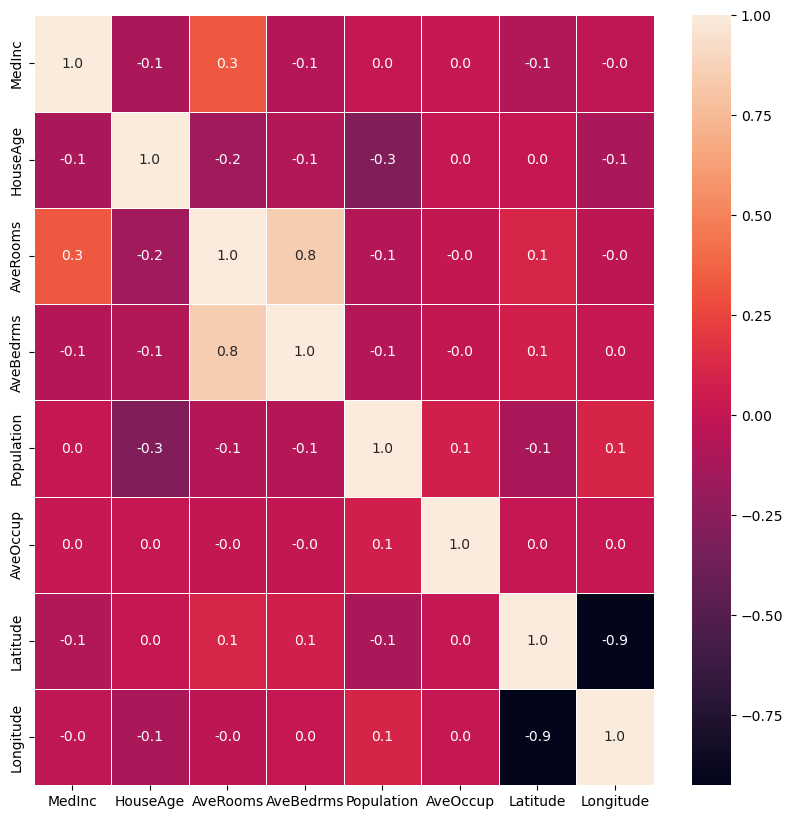

In [78]:
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(x_pd.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [79]:
x_new = x_pd.drop(['Latitude', 'AveBedrms'], axis=1)
x_new.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Longitude
0,8.3252,41.0,6.984127,322.0,2.555556,-122.23
1,8.3014,21.0,6.238137,2401.0,2.109842,-122.22
2,7.2574,52.0,8.288136,496.0,2.802260,-122.24
3,5.6431,52.0,5.817352,558.0,2.547945,-122.25
4,3.8462,52.0,6.281853,565.0,2.181467,-122.25


In [80]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
#print(r2_score(y_test, y_pred))
r2_s = r2_score(y_test, y_pred)
mse_err = mean_squared_error(y_test, y_pred)

print(r2_s, mse_err)

0.5234167074783751 0.65163781746375


# Wrapper Based Methods
Train a model on different subsets of features, and select the most accurate one.
Supervised
Computationally Expensive!

In [81]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso

# Regression
housing = fetch_california_housing()
X, y = housing.data, housing.target

estimator = Lasso()
selector = RFE(estimator, n_features_to_select=5, step=1).fit(X, y)
print(selector.ranking_, )

[1 1 4 3 1 2 1 1]


In [82]:
X_new = selector.transform(X)
print(X_new.shape)

(20640, 5)


In [84]:
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
#print(r2_score(y_test, y_pred))
r2_s = r2_score(y_test, y_pred)
mse_err = mean_squared_error(y_test, y_pred)

print(r2_s, mse_err)

0.5922573818824148 0.5503785526377608


### RidgeCV

In [85]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeCV

# Regression
housing = fetch_california_housing()
X, y = housing.data, housing.target
ridge = RidgeCV().fit(X, y)


In [86]:
sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select="auto", direction="forward"
).fit(X, y)

print(sfs_forward)

SequentialFeatureSelector(estimator=RidgeCV(), n_features_to_select='auto')


In [87]:
X_new = sfs_forward.transform(X)
X_new.shape

(20640, 4)

In [88]:
## Important: You can now use any model with these newly selected features
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
#print(r2_score(y_test, y_pred))
r2_s = r2_score(y_test, y_pred)
mse_err = mean_squared_error(y_test, y_pred)

print(r2_s, mse_err)

0.5156421909770823 0.6476964669115535


# PCA

In [89]:
dataset = fetch_california_housing()
x = dataset['data']
y = dataset['target']
feature_names = dataset['feature_names']

print(x.shape)

(20640, 8)


In [90]:
from sklearn.decomposition import PCA
X_new = PCA(n_components=7, svd_solver='full').fit_transform(x)
print(X_new.shape)

(20640, 7)


In [91]:
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
#print(r2_score(y_test, y_pred))
r2_s = r2_score(y_test, y_pred)
mse_err = mean_squared_error(y_test, y_pred)

print(r2_s, mse_err)

0.5763420362467737 0.5593724362678996


# Wrapper method give best score
print(r2_s, mse_err)
0.5922573818824148 0.5503785526377608